# Data set Summary

This is image data of Natural Scenes around the world made by intel
it has 6 categories  {'mountain', 'street', 'glacier', 'buildings', 'sea', 'forest'}
and the total number of images are around 25k

In [ ]:
import os
from sklearn.utils import shuffle           
from tqdm import tqdm
import cv2      
import numpy as np


# Loading data set and exploring it

In [2]:
base_dir = 'C://Users//PC//Desktop//jupyter project//course 5//'

datasets =[base_dir +'seg_train//seg_train',base_dir+'seg_test//seg_test']
  
# print the list
print(datasets)

['C://Users//PC//Desktop//jupyter project//course 5//seg_train//seg_train', 'C://Users//PC//Desktop//jupyter project//course 5//seg_test//seg_test']


In [ ]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
IMAGE_SIZE = (150, 150)

here we are  encoding our labels (y or the target)

In [4]:
class_names_label

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

In [7]:
def load_data():

    output = []

    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [8]:
(X_train,y_train), (X_test, y_test) = load_data()


  9%|██████▌                                                                      | 187/2191 [00:00<00:01, 1869.58it/s]

Loading C://Users//PC//Desktop//jupyter project//course 5//seg_train//seg_train


 88%|████████████████████████████████████████████████████████████████████▋         | 385/437 [00:00<00:00, 1932.51it/s]

Loading C://Users//PC//Desktop//jupyter project//course 5//seg_test//seg_test


100%|██████████████████████████████████████████████████████████████████████████████| 501/501 [00:00<00:00, 1814.81it/s]


After successfuly loading the data we need to shuffle it using the shuffling method
so that when we train our models we can make sure that we can get a good validation accuracy over here

In [9]:
X_train, y_train = shuffle(X_train, y_train, random_state=25)


Now lets check if our 6 classes are equaly distributed in both our training and test sets

In [10]:
unique1, counts_train = np.unique(y_train, return_counts=True)
unique2,counts_test=np.unique(y_test, return_counts=True)

In [11]:
result_train = np.column_stack((class_names, counts_train)) 
result_test=np.column_stack((class_names, counts_test))

In [12]:
import pandas as pd

df_train = pd.DataFrame(data=result_train,columns=['class','count'])
df_test=pd.DataFrame(data=result_test,columns=['class','count'])
                     

since we have manage to create 2 data frames using the pandas library 
for each of our train and test sets
we now need to recast the data types of the count of our classes so we can use seaborn library to visualise our data

In [13]:
df_train['count']=df_train['count'].astype(str).astype(int)
df_test['count']=df_test['count'].astype(str).astype(int)
df_train['class']=df_train['class'].astype(str)
df_test['class']=df_test['class'].astype(str)

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   6 non-null      object
 1   count   6 non-null      int32 
dtypes: int32(1), object(1)
memory usage: 200.0+ bytes


Now lets check the distribution

<AxesSubplot:xlabel='class', ylabel='count'>

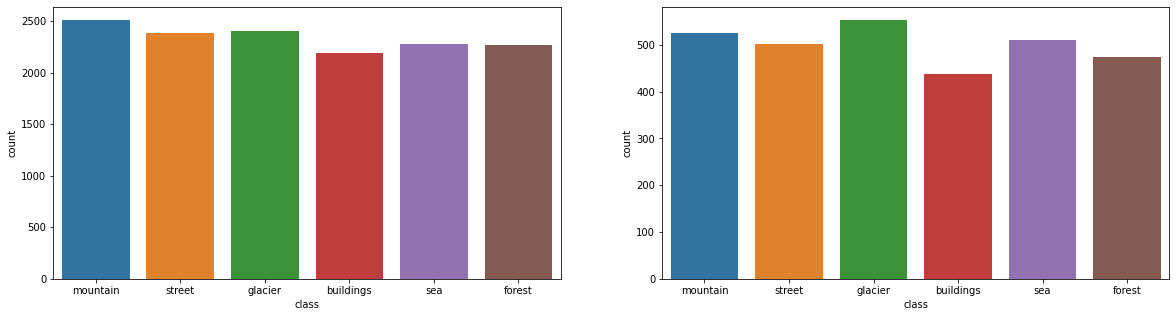

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
figure, ax = plt.subplots(1,2,figsize=(20,5))

sns.barplot(x='class',y='count',data=df_train,ax=ax[0])
sns.barplot(x='class',y='count',data=df_test,ax=ax[1])

as we can see here our classes are almost equally distributed in both our training and test sets
and our data seems to be well balanced

Lets dirtrubute our data on a pie chart just to make sure 

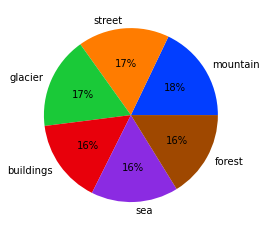

In [17]:

colors = sns.color_palette('bright')

plt.pie(df_train['count'], labels = class_names, colors = colors, autopct='%.0f%%');


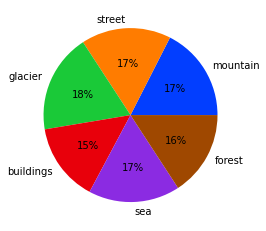

In [18]:
plt.pie(df_test['count'], labels = class_names, colors = colors, autopct='%.0f%%');


and again here we are sure that out data is equally distributed in both our training and test sets

Now lets rescale our values to be between 0 and 1 since we will be using CNN and nearal networks so its better for our data to be scaled

In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Now lets randomly take a look at one of our images from our training test

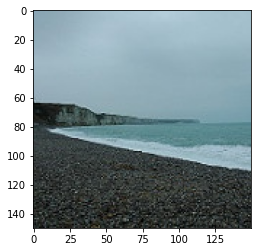

In [20]:
plt.imshow(X_train[444]);

here we can witness a beautiful picture of the sea

In [21]:
X_train[123].shape

(150, 150, 3)

# CNN 

we will create a cnn model that has 9 layers with relu being the activation function for the first 2 convolutional layers layers as well as our dense layer

and of course our last layer that will have 6 neurons (according to the number of our classes (outputs))will have an activation function of softmax

the first two layers will have 32 filters that are 3x3 and the strides(number of steps)will be a 2x2

we will also add a maxpooling 2d layer to reduce the dimensions and just keep the important features of our photo


In [22]:
from keras.models import Sequential
from keras.layers import MaxPooling2D,Conv2D
from keras.layers import Dense, Dropout, Activation, Flatten

model_1 = Sequential()

model_1.add(Conv2D(32, (3, 3), activation='relu',strides = (2,2), padding='same',
                 input_shape=X_train.shape[1:])),

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (3, 3),activation='relu' ,strides = (2,2)))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(128))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.25))
model_1.add(Dense(6,activation='softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 75, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 18, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 18, 18, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1327232   
_________________________________________________________________
activation (Activation)      (None, 128)               0

In [23]:
model_1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model_1.fit(X_train, y_train, batch_size=64, epochs=20, validation_split = 0.2)

Epoch 1/20
176/176 [==============================] - 21s 116ms/step - loss: 1.3061 - accuracy: 0.4888 - val_loss: 0.8411 - val_accuracy: 0.6918
Epoch 2/20
176/176 [==============================] - 21s 119ms/step - loss: 0.8271 - accuracy: 0.6889 - val_loss: 0.7492 - val_accuracy: 0.7178
Epoch 3/20
176/176 [==============================] - 21s 118ms/step - loss: 0.7064 - accuracy: 0.7418 - val_loss: 0.6397 - val_accuracy: 0.7713
Epoch 4/20
176/176 [==============================] - 21s 119ms/step - loss: 0.5495 - accuracy: 0.8058 - val_loss: 0.6820 - val_accuracy: 0.7602
Epoch 5/20
176/176 [==============================] - 21s 118ms/step - loss: 0.4711 - accuracy: 0.8274 - val_loss: 0.6028 - val_accuracy: 0.7862
Epoch 6/20
176/176 [==============================] - 21s 118ms/step - loss: 0.3752 - accuracy: 0.8647 - val_loss: 0.6130 - val_accuracy: 0.7841
Epoch 7/20
176/176 [==============================] - 21s 118ms/step - loss: 0.3102 - accuracy: 0.8906 - val_loss: 0.6588 - val_ac

In [25]:
model_1.save('model1.h5')


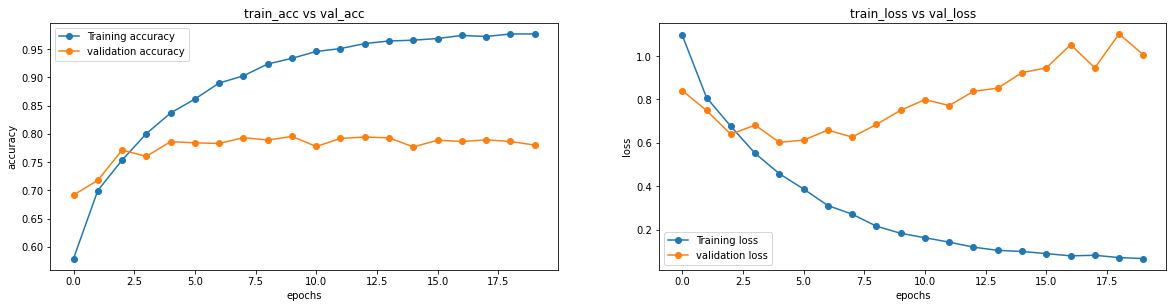

In [27]:
fig = plt.figure(figsize=(20,10))

    # Plot accuracy
plt.subplot(221)
plt.plot(history.history['accuracy'],  marker='o',label = "Training accuracy")
plt.plot(history.history['val_accuracy'],  marker='o',label = "validation accuracy")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

    # Plot loss function
plt.subplot(222)
plt.plot(history.history['loss'], marker='o',label = "Training loss")
plt.plot(history.history['val_loss'],marker='o' ,label = "validation loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")

plt.legend()
plt.show()

as we can see here our model did kinda a good job
we can see that our val_acc was at its lowest around 10 and 13 or 14 epochs



In [28]:
test_loss_1 = model_1.evaluate(X_test, y_test)


94/94 [==============================] - 1s 12ms/step - loss: 1.0069 - accuracy: 0.7790


So after testing our model on our test test we can see that our model have managed to classify 78 percent of the number of pictures in the test set correctly


In [29]:
predictions_1 = model_1.predict(X_test)
pred_labels_1 = np.argmax(predictions_1, axis = 1) 

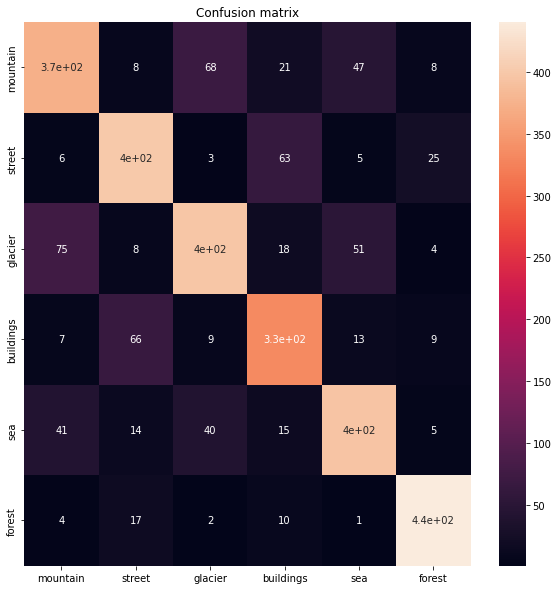

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
CM = confusion_matrix(y_test, pred_labels_1)
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

we can see here in the confusion matrix that our model  mostly misclassified  and got confused between mountains and glacier
and also between buildings and streets , sea and glacier 

# VGG16

Now here we will used the vgg16 pretrained model to see if we can acheive better results 

In [53]:
from tensorflow.keras.applications.vgg16 import VGG16


In [54]:
model_2 = VGG16(weights='imagenet',include_top=False)
model_2.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

so we will be using our vgg16 model to extract the important featrues from our training and test set 
so we can use them to train our model faster and more effectively


In [33]:
train_features = model_2.predict(X_train)
test_features = model_2.predict(X_test)

In [55]:
train_features[0].shape

(4, 4, 512)

we can see here that our 150x150x3 photo
truned into 4,4,512 
sso now lets use our vgg16 model to train it on these features and see if we can acheive better results

In [67]:
import tensorflow as tf
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (4, 4, 512)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model_2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history_2 = model_2.fit(train_features, y_train, batch_size=64, epochs=15, validation_split = 0.2)

Epoch 1/15
176/176 [==============================] - 1s 6ms/step - loss: 0.6581 - accuracy: 0.7500 - val_loss: 0.3428 - val_accuracy: 0.8660
Epoch 2/15
176/176 [==============================] - 1s 5ms/step - loss: 0.2773 - accuracy: 0.9027 - val_loss: 0.4342 - val_accuracy: 0.8383
Epoch 3/15
176/176 [==============================] - 1s 5ms/step - loss: 0.2366 - accuracy: 0.9136 - val_loss: 0.3638 - val_accuracy: 0.8725
Epoch 4/15
176/176 [==============================] - 1s 6ms/step - loss: 0.1624 - accuracy: 0.9428 - val_loss: 0.3305 - val_accuracy: 0.8881
Epoch 5/15
176/176 [==============================] - 1s 6ms/step - loss: 0.1219 - accuracy: 0.9601 - val_loss: 0.3932 - val_accuracy: 0.8664
Epoch 6/15
176/176 [==============================] - 1s 5ms/step - loss: 0.1002 - accuracy: 0.9672 - val_loss: 0.3594 - val_accuracy: 0.8810
Epoch 7/15
176/176 [==============================] - 1s 5ms/step - loss: 0.0740 - accuracy: 0.9772 - val_loss: 0.4070 - val_accuracy: 0.8821
Epoch 

In [68]:

test_loss_2 = model_2.evaluate(test_features, y_test)


94/94 [==============================] - 0s 946us/step - loss: 0.5965 - accuracy: 0.8603


as we can see here we have managed to get 86 percent accuracy on our test set compared to a 78 percent that we got on our CNN 
so this indicates that the VGG 16 model definetly did a better job

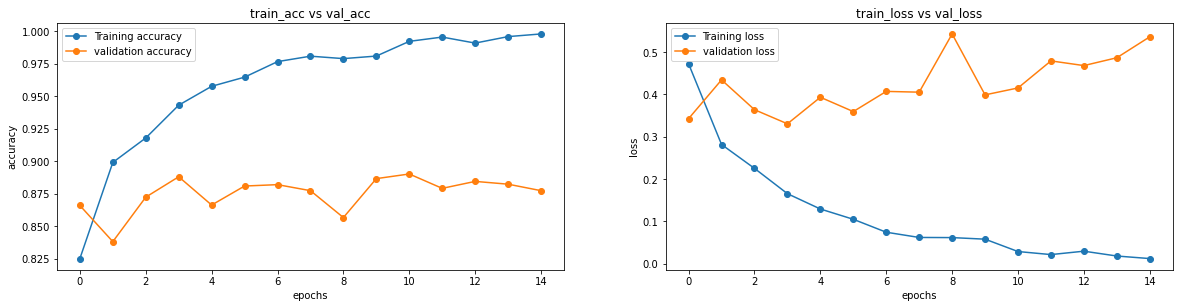

In [69]:
fig = plt.figure(figsize=(20,10))

    # Plot accuracy
plt.subplot(221)
plt.plot(history_2.history['accuracy'],  marker='o',label = "Training accuracy")
plt.plot(history_2.history['val_accuracy'],  marker='o',label = "validation accuracy")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

    # Plot loss function
plt.subplot(222)
plt.plot(history_2.history['loss'], marker='o',label = "Training loss")
plt.plot(history_2.history['val_loss'],marker='o' ,label = "validation loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")

plt.legend()
plt.show()

we can se here that we had the best validation accuracy on the 8th epoch 

In [70]:
predictions_2 = model_2.predict(test_features)
pred_labels_2 = np.argmax(predictions_2, axis = 1) 

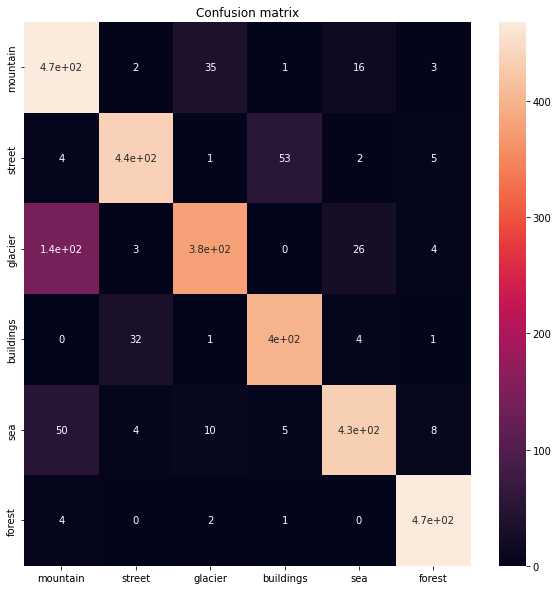

In [71]:
CM = confusion_matrix(y_test, pred_labels_2)
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

we can see here that our model almost did a better job at being able to classify our different classes
but again we can see here a lot of our mountains are being miss classified as glacier

# Results

we can see here that both our CNN and vgg16 models did a good job

however our vgg16 model did slightly a better job than our CNN
despite the fact that both models are highly confused between moutains adn glacier 
specially the VGG16 model

# Next Steps


We could further experiment trying out other pre-trained models like Xception, ResNet or Inception.